In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('gdrive/My Drive/CSV_Files/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
df.shape

(829275, 4)

In [5]:
clus = df[['Lat', 'Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [0]:
distortation = []
K = range(1,10)
for i in K:
  kmean = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, random_state=12345)
  kmean.fit(clus)
  distortation.append(kmean.inertia_)

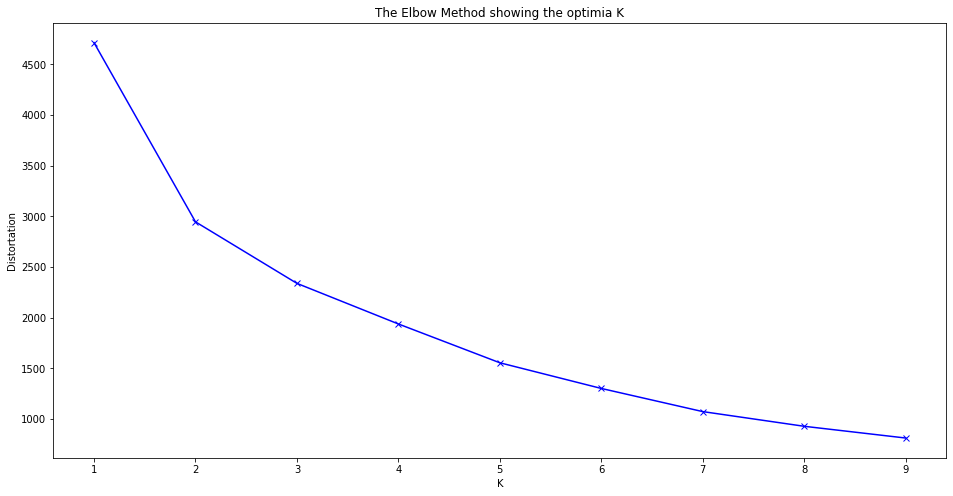

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, distortation, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortation')
plt.title('The Elbow Method showing the optimia K')
plt.show()

In [8]:
kmean = KMeans(n_clusters=6, init='k-means++', max_iter = 300, random_state = 10 )
kmean.fit(clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [9]:
centroids = kmean.cluster_centers_
centroids

array([[ 40.79621797, -73.8919077 ],
       [ 40.75781974, -73.98120026],
       [ 40.708056  , -73.98538945],
       [ 40.66114636, -73.78701975],
       [ 40.69625377, -74.19976008],
       [ 40.81340199, -73.53396319]])

In [10]:
new_location = [(40.5666, -73.5631)]
kmean.predict(new_location)

array([3], dtype=int32)

In [0]:
colocation = pd.DataFrame(centroids, columns = ['Lat', 'Long'])

In [12]:
colocation.head()

,Lat,Long
0,40.796218,-73.891908
1,40.757820,-73.981200
2,40.708056,-73.985389
3,40.661146,-73.787020
4,40.696254,-74.199760


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


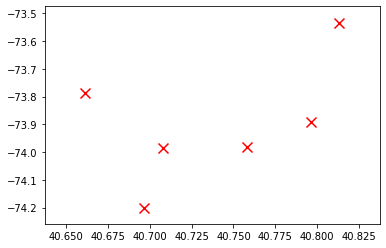

In [13]:
plt.scatter(colocation['Lat'], colocation['Long'], marker = 'x', color = 'R', s = 100);

In [14]:
import folium
centroid = colocation.values.tolist()
print(centroid)
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 25)
for point in range(0, len(centroid)):
  folium.Marker(centroid[point], popup= folium.Popup(centroid[point])).add_to(map)
map

[[40.79621796658565, -73.89190769923687], [40.75781973721104, -73.98120026274063], [40.708055997642944, -73.9853894484063], [40.66114636054772, -73.78701975359483], [40.696253766293694, -74.19976007613336], [40.81340199081164, -73.53396318529862]]


In [0]:
clusters = kmean.fit_predict(clus)

In [16]:
df['Cluster'] = pd.DataFrame(clusters)
df.head()

,Date/Time,Lat,Lon,Base,Cluster
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,1
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,2
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,2
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,1
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,2


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3678: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


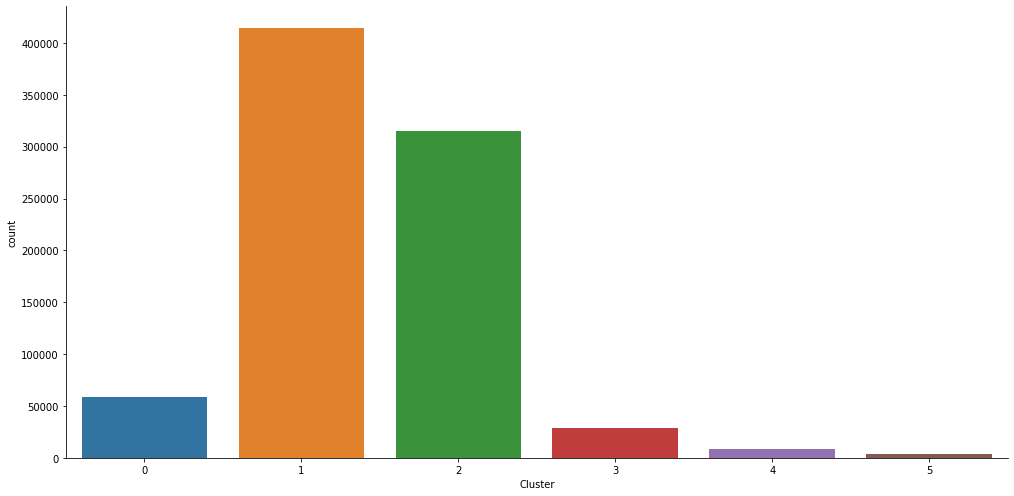

In [17]:
sns.factorplot(x='Cluster', data = df, kind = 'count', size=7, aspect=2);

DBSCAN

In [22]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (108 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Pre

In [23]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 5.0MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702064 sha256=5f7c14e973e9444949ec9f29d3433615c8d66bac46f5b0668191fba979ca2df0
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.2.post1
    Uninstalling pyproj-2.4.2.post1:
      Successfully uninstalled pyproj-2.4.2.post1


In [24]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=798570501ab7eec9f714c126116eff9c8da32d7b414ddb5fec49fbb9691ba4c0
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [0]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import mplleaflet as mpl

from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [0]:
rides = pd.read_csv('gdrive/My Drive/CSV_Files/uber-raw-data-aug14.csv')
rides.info()

In [27]:
rides.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [28]:
rides.columns = ['timestamp', 'lat', 'lon', 'base']
rides.head()

,timestamp,lat,lon,base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [0]:
rides['timestamp'] = pd.to_datetime(rides['timestamp'])

In [0]:
#rides.timestamp

In [30]:
rides['weekday'] = rides.timestamp.dt.weekday_name
rides['month']   = rides.timestamp.dt.month
rides['day']     = rides.timestamp.dt.day
rides['hour']    = rides.timestamp.dt.hour
rides.head()

,timestamp,lat,lon,base,weekday,month,day,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,8,1,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,8,1,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,8,1,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,8,1,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,8,1,0


In [0]:
day_map = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides['weekday'] = pd.Categorical(rides['weekday'], categories=day_map, ordered=True)

In [32]:
rides.weekday.tail()

829270    Sunday
829271    Sunday
829272    Sunday
829273    Sunday
829274    Sunday
Name: weekday, dtype: category
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [33]:
hourly_ride_data = rides.groupby(['day', 'hour', 'weekday'])['timestamp'].count()
hourly_ride_data.head()

day  hour  weekday
1    0     Friday     734
     1     Friday     451
     2     Friday     289
     3     Friday     318
     4     Friday     412
Name: timestamp, dtype: int64

In [0]:
hourly_ride_data = hourly_ride_data.reset_index()

In [0]:
hourly_ride_data = hourly_ride_data.rename(columns={'timestamp':'ride_count'})

In [36]:
hourly_ride_data.head()

,day,hour,weekday,ride_count
0,1,0,Friday,734
1,1,1,Friday,451
2,1,2,Friday,289
3,1,3,Friday,318
4,1,4,Friday,412


In [37]:
weekday_hourly_avg = hourly_ride_data.groupby(['weekday','hour'])['ride_count'].mean()
weekday_hourly_avg = weekday_hourly_avg.reset_index()
weekday_hourly_avg = weekday_hourly_avg.rename(columns={'ride_count':'average_rides'})
weekday_hourly_avg = weekday_hourly_avg.sort_index()
weekday_hourly_avg.shape
weekday_hourly_avg.head()

,weekday,hour,average_rides
0,Monday,0,273.5
1,Monday,1,171.0
2,Monday,2,140.0
3,Monday,3,296.5
4,Monday,4,459.0


In [38]:
weekday_hourly_avg.shape

(168, 3)

In [0]:
color_description = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207) ]
for i in range(len(color_description)):
  r, g, b = color_description[i]
  color_description[i] = (r/255., g/255., b/255.)

Text(0.5, 0, 'Hour')

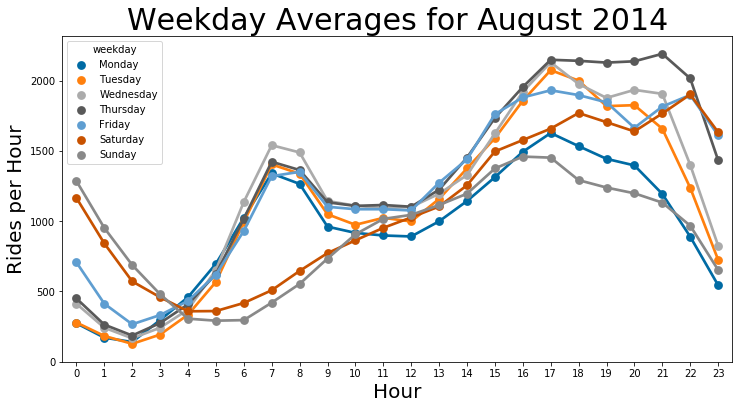

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
current_palette = sns.color_palette(color_description)
sns.pointplot(ax=ax, x = 'hour', y = 'average_rides', hue='weekday',
              palette = current_palette, data = weekday_hourly_avg);


ax.set_title('Weekday Averages for August 2014', fontsize=30)
ax.set_ylabel('Rides per Hour', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

In [0]:
def get_hot_spots(max_distance,min_cars,ride_data):
    
    ## get coordinates from ride data
    coords = ride_data.as_matrix(columns=['lat', 'lon'])
    
    ## calculate epsilon parameter using
    ## the user defined distance
    kms_per_radian = 6371.0088
    epsilon = max_distance / kms_per_radian
    
    ## perform clustering
    db = DBSCAN(eps=epsilon, min_samples=min_cars,
                algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    
    ## group the clusters
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
    ## report
    print('Number of clusters: {}'.format(num_clusters))
    
    ## initialize lists for hot spots
    lat = []
    lon = []
    num_members = []
    
    ## loop through clusters and get centroids, number of members
    for ii in range(len(clusters)):

        ## filter empty clusters
        if clusters[ii].any():

            ## get centroid and magnitude of cluster
            lat.append(MultiPoint(clusters[ii]).centroid.x)
            lon.append(MultiPoint(clusters[ii]).centroid.y)
            num_members.append(len(clusters[ii]))
            
    hot_spots = [lon,lat,num_members]
    #print(coords)
    #print(clusters)
    
    return hot_spots

In [42]:
## get ride data

#ride_data = rides.loc[(rides['weekday']== 'Saturday') & (rides['hour'] > 0) & (rides['hour'] < 4)]
ride_data = rides.loc[(rides['weekday']== 'Monday') & (rides['hour'] > 7) & (rides['hour'] < 10)]

## maximum distance between two cluster members in kilometers
max_distance = 0.05

## minimum number of cluster members
min_pickups = 25

## call the get_hot_spots function
hot_spots = get_hot_spots(max_distance ,min_pickups, ride_data)
print('Number of rides in cluster 0:  {}' .format(hot_spots[2][0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Number of clusters: 10
Number of rides in cluster 0:  218


In [43]:
## make the figure
fig, ax = plt.subplots(figsize=(14,8))

## set the color scale
color_scale = np.log(hot_spots[2])

## make the scatter plot
plt.scatter(hot_spots[0], hot_spots[1],s=80,c=color_scale,cmap=cm.cool)
plt.title('Centroids for DBSCAN')

## display the Leaflet
# mpl.show()     # opens in a new interactive tab
mpl.display()  # shows interactive map inline in Jupyter but cannot handle large data sets